## Project 2
##### Ebru Dagdelen
##### 11/8/2023-11/21/2023
Project 2: Web Scraped Data Analysis

Our goal for this notebook is to analyze data that was scraped from the internet. We will answer the following questions from the scraped data(Billboard's top 100 songs):

    1.Which genres dominate the Top 100 chart currently?

    2.Which artist has the most songs on the chart?

    3.What genre songs are on the chart the longest?

    4.Are the top genres in the previous 5 weeks the same? If not, what genres have the highest distribution in each week?

In [70]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
def get_page(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page)
        return soup
    else:
        print(f"Oops! Received status code {status}")
        return ""

### Scrape data from one page and store in a DataFrame

In [72]:
def scrape_top100_data(url):
    soup = get_page(url)
    
    if soup:
        top100_list = []
        stats_table = soup.find(class_='std').tbody

        for row in stats_table.find_all('tr'):
            position = row.find(attrs={'itemprop': 'position'}).text.replace('\n', '')
            previous_position = row.find(attrs={'class': 'cStats cMhidden'}).text.replace('\n', '')
            songs = row.find(attrs={'class': 'cPrinciple'}).a.span.text.replace('\n', '')
            artist = row.find(attrs={'itemprop': 'byArtist'}).text.replace('\n', '')
            peak = row.find_all(attrs={'class': 'cStats cShidden'})[0].text.replace('\n', '')
            weeks = row.find_all(attrs={'class': 'cStats cShidden'})[1].text.replace('\n', '')
            top100_list.append({'pos': position, 'prev.pos.': previous_position, 'songs': songs, 'artist': artist, 'peak': peak, 'weeks': weeks})

        return pd.DataFrame(top100_list)
    else:
        return None

In [73]:
week45 = 'https://acharts.co/us_singles_top_100/2023/45'
top100_45 = scrape_top100_data(week45)

In [74]:
top100_45

,pos,prev.pos.,songs,artist,peak,weeks
0,1,new,Is It Over Now? (taylor's Version) (from The V...,Taylor Swift,1,1
1,2,new,Now That We Don't Talk (taylor's Version) (fro...,Taylor Swift,2,1
2,3,re-entry,Run (taylor's Version) (from The Vault),Taylor Swift,3,3
3,4,2,Paint The Town Red,Doja Cat,1,13
4,5,new,Don't You (taylor's Version) (from The Vault),Taylor Swift,5,1
...,...,...,...,...,...,...
95,96,new,Mr. Take Ya B*tch,Lil Mabu,96,1
96,97,97,The Painter,Cody Johnson,55,4
97,98,91,Standing Room Only,Tim McGraw,61,8
98,99,80,Mi Ex Tenia Razon,Karol G,22,11


In [75]:
week44 = 'https://acharts.co/us_singles_top_100/2023/44'
top100_44 = scrape_top100_data(week44)
top100_44

,pos,prev.pos.,songs,artist,peak,weeks
0,1,1,Cruel Summer,Taylor Swift,1,25
1,2,2,Paint The Town Red,Doja Cat,1,12
2,3,3,Snooze,SZA,2,46
3,4,6,I Remember Everything,Zach Bryan,1,9
4,5,7,Fast Car,Luke Combs,2,31
...,...,...,...,...,...,...
95,96,re-entry,Call Your Friends,Rod Wave,18,9
96,97,re-entry,The Painter,Cody Johnson,55,3
97,98,re-entry,Deli,Ice Spice,41,13
98,99,84,Bahamas Promises,Drake,20,3


In [76]:
week43 = 'https://acharts.co/us_singles_top_100/2023/43'
top100_43 = scrape_top100_data(week43)
top100_43

,pos,prev.pos.,songs,artist,peak,weeks
0,1,9,Cruel Summer,Taylor Swift,1,24
1,2,4,Paint The Town Red,Doja Cat,1,11
2,3,7,Snooze,SZA,2,45
3,4,2,Idgaf,Drake,2,2
4,5,new,Monaco,Bad Bunny,5,1
...,...,...,...,...,...,...
95,96,78,Everything I Love,Morgan Wallen,14,34
96,97,89,On My Mama,Victoria Monet,76,5
97,98,77,Turks & Caicos,Rod Wave,24,5
98,99,82,Better Place,'n Sync,25,3


In [77]:
week42 = 'https://acharts.co/us_singles_top_100/2023/42'
top100_42 = scrape_top100_data(week42)
top100_42

,pos,prev.pos.,songs,artist,peak,weeks
0,1,new,First Person Shooter,Drake,1,1
1,2,new,Idgaf,Drake,2,1
2,3,new,Virginia Beach,Drake,3,1
3,4,1,Paint The Town Red,Doja Cat,1,10
4,5,new,Calling For You,Drake,5,1
...,...,...,...,...,...,...
95,96,90,God Gave Me A Girl,Russell Dickerson,90,2
96,97,new,Y Lloro,Junior H,97,1
97,98,72,Telekinesis,Travis Scott,26,11
98,99,57,Seven,Jung Kook,1,13


In [78]:
week41 = 'https://acharts.co/us_singles_top_100/2023/41'
top100_41 = scrape_top100_data(week41)
top100_41

,pos,prev.pos.,songs,artist,peak,weeks
0,1,1,Paint The Town Red,Doja Cat,1,9
1,2,2,Snooze,SZA,2,43
2,3,4,Cruel Summer,Taylor Swift,3,22
3,4,3,Fast Car,Luke Combs,2,28
4,5,new,3d,Jung Kook,5,1
...,...,...,...,...,...,...
95,96,75,Long Journey,Rod Wave,39,3
96,97,re-entry,But I Got A Beer In My Hand,Luke Bryan,92,3
97,98,re-entry,Rubicon,Peso Pluma,63,12
98,99,95,East Side Of Sorrow,Zach Bryan,18,6


In [79]:
#Find uniwue artist name to add genre.
unique_artists_45 = top100_45['artist'].unique()
unique_artists_44 = top100_44['artist'].unique()
unique_artists_43 = top100_43['artist'].unique()
unique_artists_42 = top100_42['artist'].unique()
unique_artists_41 = top100_41['artist'].unique()

# Combine unique artist lists from all weeks
all_unique_artists = set(np.concatenate([unique_artists_45, unique_artists_44, unique_artists_43, unique_artists_42, unique_artists_41]))

print(all_unique_artists)

{'Drake', 'David Kushner', 'Hardy', 'Teddy Swims', 'Dua Lipa', 'Rod Wave', 'Maluma', 'Paul Russell', 'Luke Bryan', 'Dustin Lynch', 'Tyla', 'Tim McGraw', 'Lil Mabu', 'Gunna', 'The Citizens Of Halloween', 'Dylan Scott', 'Sexyy Red', 'Tyler Childers', 'Jason Aldean', 'Bailey Zimmerman', 'Kenya Grace', 'Offset', 'Blink 182', 'Nate Smith', 'Parker Mccollum', 'Doja Cat', 'Peso Pluma', 'Jessie Murph', 'Doechii', 'Zach Bryan', 'Nicki Minaj', 'The Weeknd', 'Bad Bunny', 'Miley Cyrus', 'Selena Gomez', 'Metro Boomin', 'Troye Sivan', 'SZA', 'Noah Kahan', 'Lil Durk', 'Jelly Roll', 'Mitski', 'Grupo Frontera', 'Cardi B', 'Ray Parker Jr', 'Rema', 'Usher', 'Olivia Rodrigo', 'Rick Ross', 'Lainey Wilson', 'Lil Yachty', 'Fuerza Regida', 'Taylor Swift', 'Victoria Monet', 'Junior H', "'n Sync", 'Meek Mill', 'Karol G', 'Myke Towers', 'Billie Eilish', 'Calle 24 X Chino Pacas X Fuerza Regida', 'Morgan Wallen', 'Jung Kook', 'Russell Dickerson', 'Ice Spice', 'Peso Pluma X Jasiel Nunez X Junior H', 'Kid Laroi', 'T

In [80]:
#Add genre to each song according to artist name.
artist_genre_mapping = {
    'Dylan Scott': 'Country',
    'Paul Russell': 'Rap',
    'Drake': 'Rap',
    'Lil Tecca': 'Rap',
    'Rod Wave': 'Rap', 
    'Rick Ross': 'Rap', 
    'Lainey Wilson': 'Country', 
    'Sexyy Red': 'Rap', 
    'Billie Eilish': 'Pop', 
    'Fuerza Regida': 'Regional Mexican', 
    'The Weeknd': 'R&B', 
    'Junior H': 'Regional Mexican', 
    'Grupo Frontera': 'Regional Mexican', 
    'Dua Lipa': 'Pop', 
    'Bobby Boris Pickett': 'Pop', 
    'Tyla': 'R&B', 
    'SZA': 'R&B', 
    'Jessie Murph': 'Pop', 
    'Victoria Monet': 'Pop',
    'Dustin Lynch': 'Country', 
    'Nate Smith': 'Country', 
    'Miley Cyrus': 'Pop', 
    'Young Thug': 'Rap', 
    'Cody Johnson': 'Country', 
    "'n Sync": 'Pop', 
    'Offset':'Rap', 
    'Hardy':'Pop', 
    'Peso Pluma': 'Regional Mexican', 
    'Usher':'R&B', 
    'Young Nudy': 'Rap', 
    'Calle 24 X Chino Pacas X Fuerza Regida': 'Regional Mexican', 
    'Meek Mill': 'Rap', 
    'Selena Gomez':'Pop', 
    'Karol G': 'Regional Mexican', 
    'Metro Boomin':'Rap', 
    'Warren Zeiders': 'Country', 
    'Teddy Swims': 'R&B', 
    'Doechii':'Rap', 
    'Jason Aldean': 'Country', 
    'Noah Kahan': 'Folk-pop', 
    'Bailey Zimmerman':'Country', 
    'Morgan Wallen': 'Country', 
    'Tate Mcrae':'Pop', 
    'Lil Mabu': 'Rap', 
    'Doja Cat': 'Rap', 
    'Travis Scott':'Rap', 
    'Tyler Childers': 'Country', 
    'Jung Kook': 'Pop', 
    'Nicki Minaj': 'Rap', 
    'Blink 182':'Punk', 
    'Michael Jackson':'Pop', 
    'Ice Spice':'Rap', 
    'Russell Dickerson': 'Country', 
    'Luke Bryan': 'Country', 
    'Chris Stapleton': 'Country', 
    'Taylor Swift': 'Pop', 
    'Parker Mccollum': 'Country', 
    'Kid Laroi': 'Rap', 
    'Maluma': 'Regional Mexican', 
    'Jelly Roll': 'Rap', 
    'Bad Bunny': 'Regional Mexican', 
    'Gunna': 'Rap', 
    'Peso Pluma X Jasiel Nunez X Junior H': 'Regional Mexican', 
    'The Citizens Of Halloween': 'Halloween Hits', 
    'Tim McGraw': 'Country', 
    'Luke Combs': 'Country', 
    'Zach Bryan': 'Country', 
    'Troye Sivan': 'Pop', 
    'That Mexican Ot': 'Rap', 
    'Ray Parker Jr': 'R&B', 
    'Myke Towers': 'Rap', 
    'Mitski': 'Indie', 
    'Lil Yachty': 'Rap', 
    'Lil Durk': 'Rap', 
    'Oliver Anthony Music': 'Country', 
    'Cardi B': 'Rap', 
    'Thomas Rhett': 'Country', 
    'Olivia Rodrigo': 'Pop', 
    'Rema':'Regional Mexican', 
    'Kenya Grace': 'R&B', 
    'David Kushner': 'Pop'
}

#Function to get the genre for an artist
def get_genre(artist):
    return artist_genre_mapping.get(artist, 'Unknown')

#Add a new column 'genre' to each DataFrame
top100_45['genre'] = top100_45['artist'].apply(get_genre)
top100_44['genre'] = top100_44['artist'].apply(get_genre)
top100_43['genre'] = top100_43['artist'].apply(get_genre)
top100_42['genre'] = top100_42['artist'].apply(get_genre)
top100_41['genre'] = top100_41['artist'].apply(get_genre)

In [81]:
top100_45

,pos,prev.pos.,songs,artist,peak,weeks,genre
0,1,new,Is It Over Now? (taylor's Version) (from The V...,Taylor Swift,1,1,Pop
1,2,new,Now That We Don't Talk (taylor's Version) (fro...,Taylor Swift,2,1,Pop
2,3,re-entry,Run (taylor's Version) (from The Vault),Taylor Swift,3,3,Pop
3,4,2,Paint The Town Red,Doja Cat,1,13,Rap
4,5,new,Don't You (taylor's Version) (from The Vault),Taylor Swift,5,1,Pop
...,...,...,...,...,...,...,...
95,96,new,Mr. Take Ya B*tch,Lil Mabu,96,1,Rap
96,97,97,The Painter,Cody Johnson,55,4,Country
97,98,91,Standing Room Only,Tim McGraw,61,8,Country
98,99,80,Mi Ex Tenia Razon,Karol G,22,11,Regional Mexican


1.Which genres dominate the Top 100 chart currently?

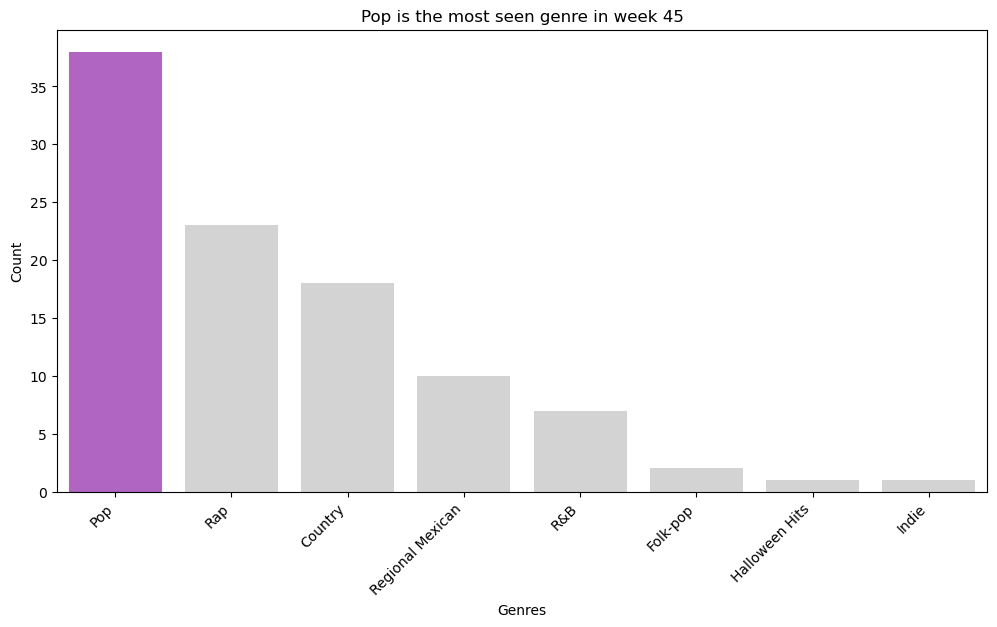

In [82]:
###Which genres dominate the Top 100 chart currently(week 45)?

#Let's make a bar chart of the genres. We first have to get the genre counts 
genre_counts45 = top100_45['genre'].value_counts()
colors = ['lightgrey'] * len(genre_counts45)  # Initialize with gray
colors[0] = 'mediumorchid'
plt.figure(figsize=(12, 6))  
sns.barplot(x=genre_counts45.index, y=genre_counts45.values, palette = colors)
plt.title('Pop is the most seen genre in week 45')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels for better readability

plt.show()

Are the top genres in the previous 5 weeks the same? If not, what genres have the highest distribution in each week?

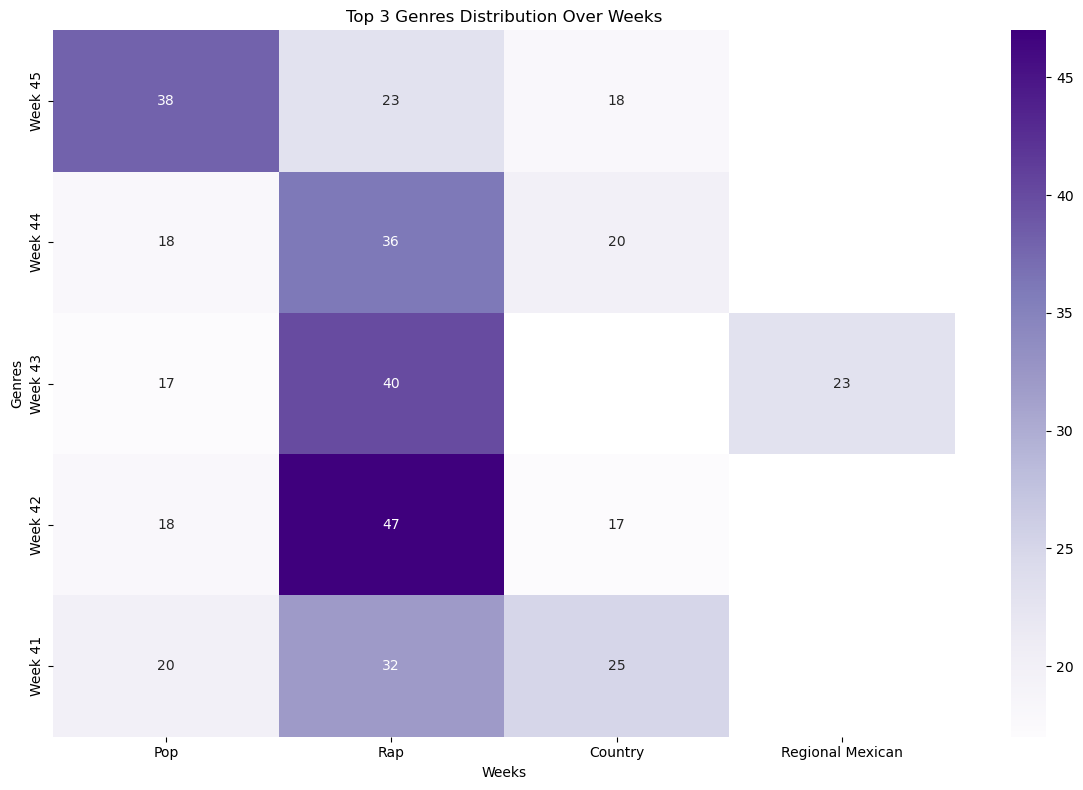

In [83]:
###Are the top genres in the previous 5 weeks the same? If not, what genres have the highest distribution in each week?

#Let's make a bar chart of the genres. We first have to get the genre counts 
genre_counts45 = top100_45['genre'].value_counts()
genre_counts44 = top100_44['genre'].value_counts()
genre_counts43 = top100_43['genre'].value_counts()
genre_counts42 = top100_42['genre'].value_counts()
genre_counts41 = top100_41['genre'].value_counts()

#all_weeks = pd.concat([top100_45, top100_44, top100_43, top100_42, top100_41])
top_genre45=genre_counts45.sort_values(ascending=False).index[:3]
top_genre44=genre_counts44.sort_values(ascending=False).index[:3]
top_genre43=genre_counts43.sort_values(ascending=False).index[:3]
top_genre42=genre_counts42.sort_values(ascending=False).index[:3]
top_genre41=genre_counts41.sort_values(ascending=False).index[:3]

data_week45 = {genre: genre_counts45[genre] for genre in top_genre45}
data_week44 = {genre: genre_counts44[genre] for genre in top_genre44}
data_week43 = {genre: genre_counts43[genre] for genre in top_genre43}
data_week42 = {genre: genre_counts42[genre] for genre in top_genre42}
data_week41 = {genre: genre_counts41[genre] for genre in top_genre41}

#Combine data
combined_data = pd.DataFrame(data={'Week 45': data_week45, 'Week 44': data_week44, 'Week 43': data_week43, 'Week 42': data_week42, 'Week 41': data_week41})

#Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data.T, annot=True, fmt='.0f', cmap='Purples') 
plt.title('Top 3 Genres Distribution Over Weeks')
plt.xlabel('Weeks')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

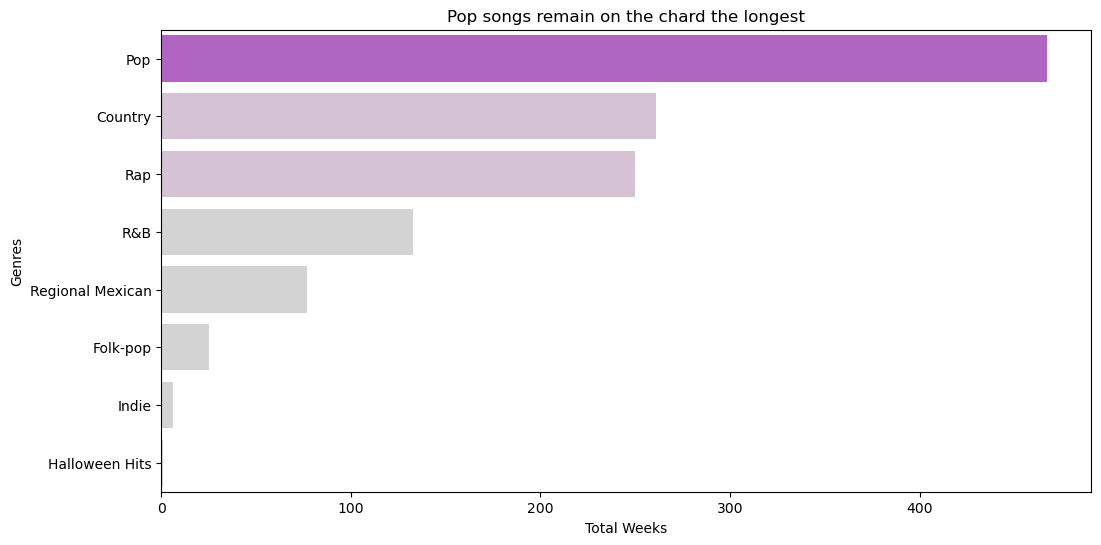

In [84]:
#What genre songs are on the chart the longest?

top100_45['weeks'] = pd.to_numeric(top100_45['weeks'], errors='coerce')

#Group the data by genre and calculate the total number of weeks each genre spends on the chart
genre_weeks = top100_45.groupby('genre')['weeks'].sum().sort_values(ascending=False).reset_index()

colors = ['lightgrey'] * len(genre_weeks)  # Initialize with gray
colors[:3] = 'mediumorchid', 'thistle', 'thistle'
plt.figure(figsize=(12, 6))
sns.barplot(x='weeks', y='genre', data=genre_weeks, palette=colors)  # Swap 'weeks' and 'genre'
plt.title('Pop songs remain on the chard the longest')
plt.xlabel('Total Weeks')
plt.ylabel('Genres')  
plt.show()

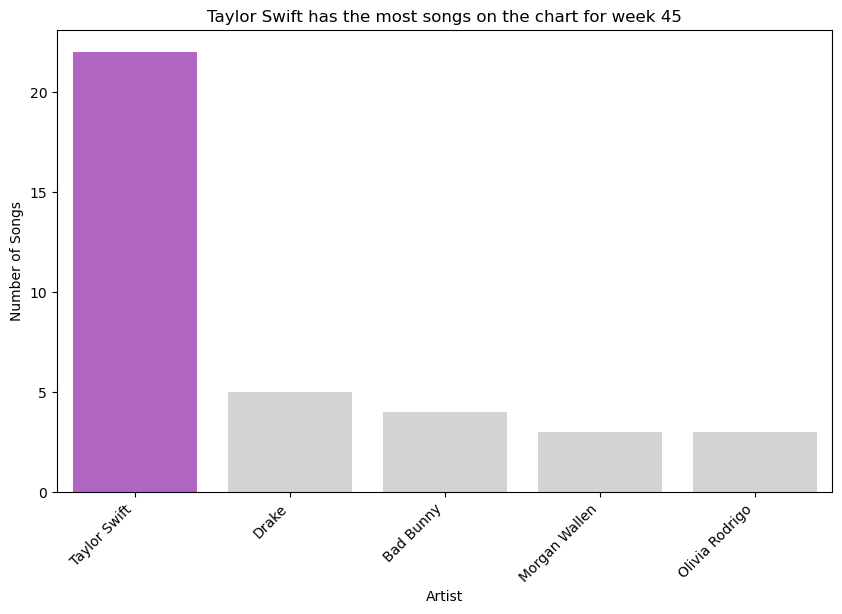

In [85]:
#Which artist has the most songs on the chart?
artist_counts = top100_45['artist'].value_counts().head(5)
colors = ['lightgrey'] * len(genre_weeks)  # Initialize with gray
colors[0] = 'mediumorchid'
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette=colors)
plt.title('Taylor Swift has the most songs on the chart for week 45')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()